In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
batch_size = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "content/iris_data/MMU-Iris-Database",
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=batch_size
)



NameError: name 'tf' is not defined

In [3]:
class_names = dataset.class_names

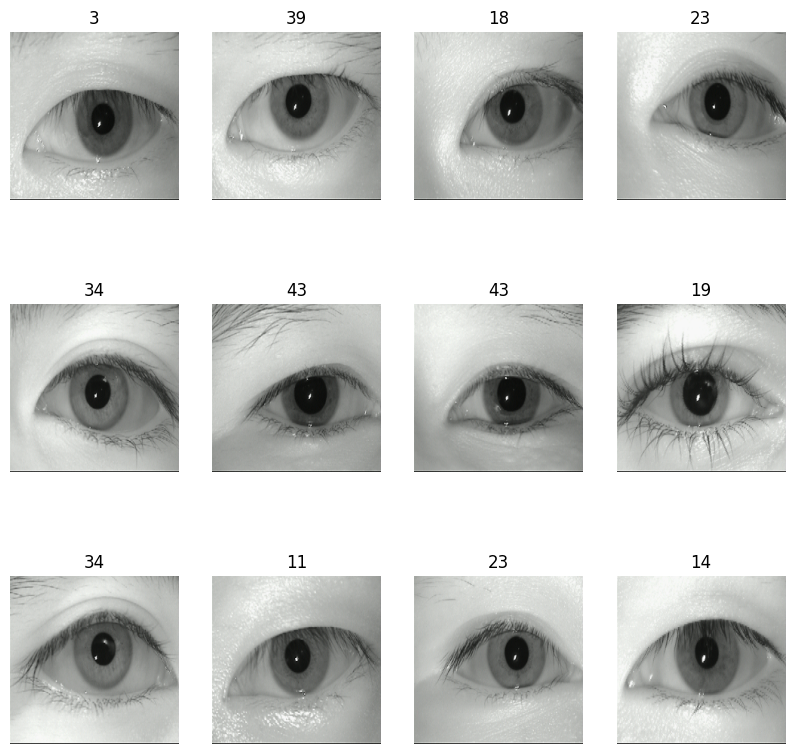

In [4]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [5]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [6]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
"""
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224, 224),
  layers.experimental.preprocessing.Rescaling(1./255)
])
"""

'\nresize_and_rescale = tf.keras.Sequential([\n  layers.experimental.preprocessing.Resizing(224, 224),\n  layers.experimental.preprocessing.Rescaling(1./255)\n])\n'

In [9]:

"""
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)
"""

'\ndata_augmentation = tf.keras.Sequential([\n  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),\n  layers.experimental.preprocessing.RandomRotation(0.2),\n])\n\ntrain_ds = train_ds.map(\n    lambda x, y: (data_augmentation(x, training=True), y)\n).prefetch(buffer_size=tf.data.AUTOTUNE)\n'

In [10]:
def plot_acc_loss(history):
  # plot the loss
  plt.plot(history.history['loss'], label='train loss')
  plt.plot(history.history['val_loss'], label='val loss')
  plt.legend()
  plt.show()
  

  # plot the accuracy
  plt.plot(history.history['accuracy'], label='train acc')
  plt.plot(history.history['val_accuracy'], label='val acc')
  plt.legend()
  plt.show()

In [11]:
input_shape = (224, 224, 3)
n_classes = len(class_names)

In [12]:
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=input_shape, activation='relu'))

model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))

model.add(layers.BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))


model.add(Dense(n_classes, activation='softmax'))


In [13]:
EPOCH = 12

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=4, verbose=1,  factor=0.4, min_lr=0.0001)

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=8, mode='auto', restore_best_weights=True)

In [14]:
opt = keras.optimizers.Adam()
model.compile(optimizer= opt ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
history = model.fit(train_ds, epochs=EPOCH ,batch_size = 32 ,validation_data=val_ds, verbose = 1,callbacks=[early_stop,lr_reduction])


Epoch 1/12
12/12 [==============================] - 19s 1s/step - loss: 3.9253 - accuracy: 0.1271 - val_loss: 132.8483 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/12
12/12 [==============================] - 17s 1s/step - loss: 1.9260 - accuracy: 0.5311 - val_loss: 102.6230 - val_accuracy: 0.0312 - lr: 0.0010
Epoch 3/12
12/12 [==============================] - 17s 1s/step - loss: 0.8941 - accuracy: 0.8192 - val_loss: 71.6069 - val_accuracy: 0.0312 - lr: 0.0010
Epoch 4/12
12/12 [==============================] - 17s 1s/step - loss: 0.6455 - accuracy: 0.8785 - val_loss: 97.3555 - val_accuracy: 0.0312 - lr: 0.0010
Epoch 5/12
12/12 [==============================] - 17s 1s/step - loss: 0.6369 - accuracy: 0.8446 - val_loss: 168.4320 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/12
12/12 [==============================] - ETA: 0s - loss: 0.3424 - accuracy: 0.9294
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
12/12 [==============================] - 17s 1s/s

In [15]:
model.evaluate(test_ds)

2/2 [==============================] - 1s 342ms/step - loss: 5.2670 - accuracy: 0.0938


[5.266975402832031, 0.09375]

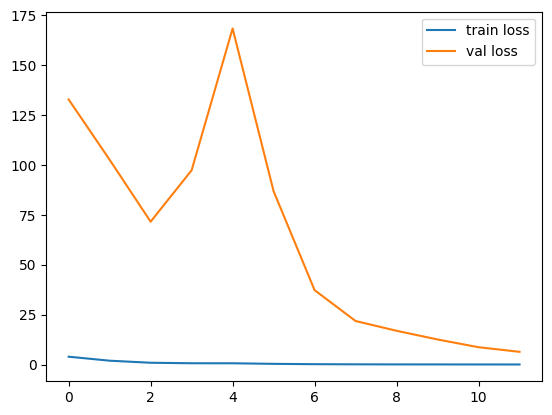

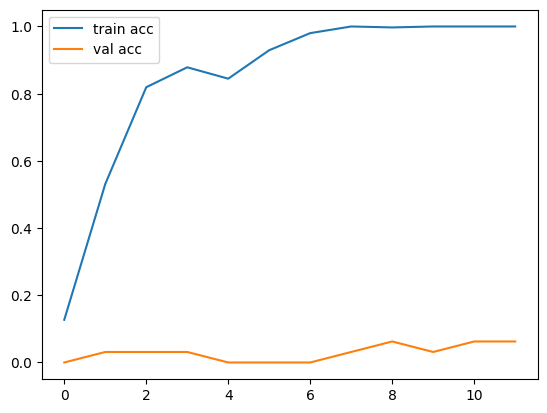

In [16]:
plot_acc_loss(history)

# EfficientNet-b0

In [17]:
from keras.applications.efficientnet import EfficientNetB0
IMAGE_SIZE = [224, 224]
efb0 = EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in efb0.layers:
    layer.trainable = False

model = Sequential()
model.add(layers.Lambda(lambda image:tf.image.resize(image,(224,224))))
model.add(efb0)
model.add(layers.Flatten())
model.add(layers.Dense(n_classes, activation='softmax'))


16705208/16705208 [==============================] - 3s 0us/step


In [18]:
EPOCH = 100

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=4, verbose=1,  factor=0.4, min_lr=0.0001)

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=8, mode='auto', restore_best_weights=True)

In [19]:
opt = keras.optimizers.Adam()
model.compile(optimizer = opt ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
history = model.fit(train_ds, epochs=EPOCH ,batch_size = 32 ,validation_data = val_ds, verbose = 1,callbacks=[early_stop,lr_reduction])

Epoch 1/100
12/12 [==============================] - 21s 1s/step - loss: 13.7567 - accuracy: 0.2853 - val_loss: 4.3182 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - 11s 939ms/step - loss: 2.2045 - accuracy: 0.8136 - val_loss: 1.6175 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - 12s 1s/step - loss: 0.2840 - accuracy: 0.9661 - val_loss: 0.7882 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 4/100
12/12 [==============================] - 11s 927ms/step - loss: 0.1978 - accuracy: 0.9774 - val_loss: 0.3138 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 5/100
12/12 [==============================] - 11s 939ms/step - loss: 0.3086 - accuracy: 0.9689 - val_loss: 3.8091e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/100
12/12 [==============================] - 12s 972ms/step - loss: 0.3918 - accuracy: 0.9718 - val_loss: 0.3873 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 7/100
12/12 [==============================] - 12s 94

In [20]:
model.evaluate(test_ds)

2/2 [==============================] - 2s 907ms/step - loss: 0.3493 - accuracy: 0.9844


[0.34932082891464233, 0.984375]

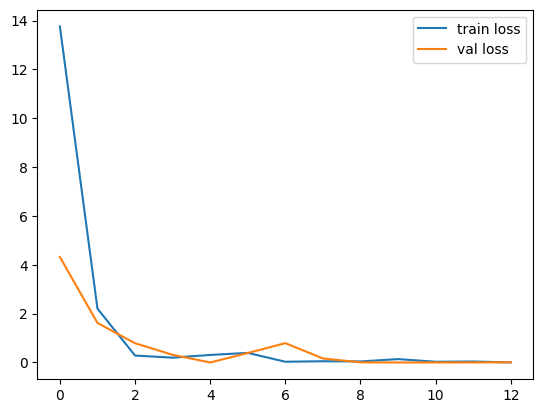

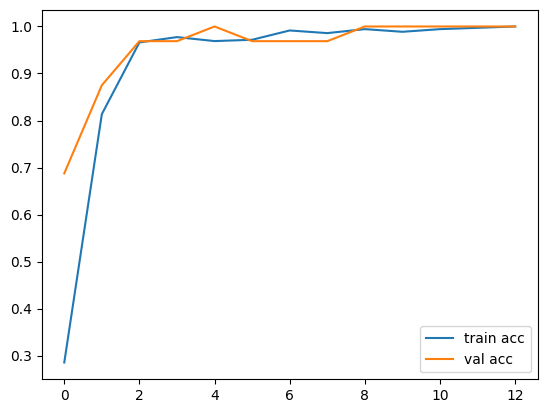

In [21]:
plot_acc_loss(history)

# Efficient B7

In [22]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
IMAGE_SIZE = [224, 224]
efb7 = EfficientNetB7(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in efb7.layers:
    layer.trainable = False

model = Sequential()
model.add(layers.Lambda(lambda image:tf.image.resize(image,(224,224))))
model.add(efb7)
model.add(layers.Flatten())
model.add(layers.Dense(n_classes, activation='softmax'))


258076736/258076736 [==============================] - 79s 0us/step


In [23]:
EPOCH = 100

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=4, verbose=1,  factor=0.4, min_lr=0.0001)

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=8, mode='auto', restore_best_weights=True)

In [24]:
opt = keras.optimizers.Adam()
model.compile(optimizer = opt ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
history = model.fit(train_ds, epochs=EPOCH ,batch_size = 32 ,validation_data = val_ds, verbose = 1,callbacks=[early_stop,lr_reduction])

Epoch 1/100
12/12 [==============================] - 99s 7s/step - loss: 35.8755 - accuracy: 0.1271 - val_loss: 19.1179 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - 68s 6s/step - loss: 20.4905 - accuracy: 0.4407 - val_loss: 10.6086 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - 69s 6s/step - loss: 7.8873 - accuracy: 0.6017 - val_loss: 1.9871 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/100
12/12 [==============================] - 68s 6s/step - loss: 1.6443 - accuracy: 0.8898 - val_loss: 1.1482 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/100
12/12 [==============================] - 68s 6s/step - loss: 1.5283 - accuracy: 0.8729 - val_loss: 0.1681 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 6/100
12/12 [==============================] - 68s 6s/step - loss: 0.3982 - accuracy: 0.9520 - val_loss: 0.0147 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/100
12/12 [==============================] - 68s 6s/step - loss:

In [25]:
model.evaluate(test_ds)

2/2 [==============================] - 11s 5s/step - loss: 0.6179 - accuracy: 0.9531


[0.6179004907608032, 0.953125]

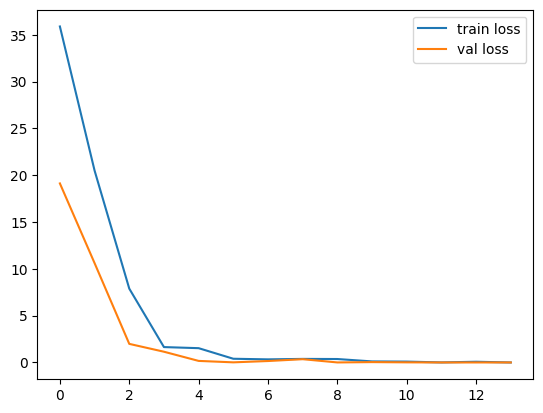

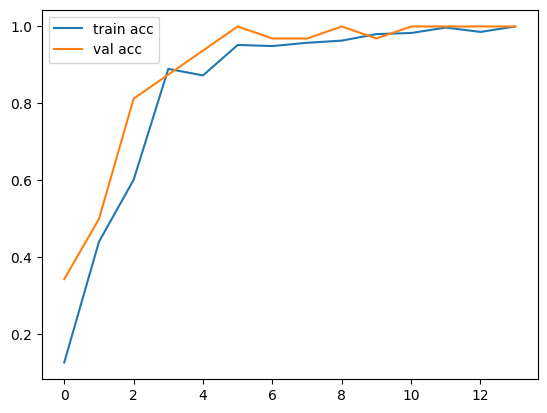

In [26]:
plot_acc_loss(history)